## CLASSWORK WEEK-2

### DATA EXPLORATION AND  REGULAR EXPRESSIONS

 IMPORTING PACKAGES AND READING FILE

In [1]:
import pandas as pd
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)  #head() displays first 20 rows 

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


### DISPLAYING COLUMNS IN DATAFRAME

In [2]:
#displays all the columns in the dataframe
df.columns  


Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

### DATA TYPES OF EACH COLUMN

In [3]:
#gives datatype of columns
df.dtypes  


session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [4]:
# gives information about all the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [5]:
df.describe()  #generates descriptive statistics of a DataFrame 

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


### LENGTH FUNCTION

In [6]:
df['length'] = df['text'].str.len()  #creates new column length
df.describe()

,session,year,length
count,7507.000000,7507.000000,7507.000000
mean,49.610763,1994.610763,17967.281604
std,12.892155,12.892155,7860.038463
min,25.000000,1970.000000,2362.000000
25%,39.000000,1984.000000,12077.000000
50%,51.000000,1996.000000,16424.000000
75%,61.000000,2006.000000,22479.500000
max,70.000000,2015.000000,72041.000000


## Describe()

In [7]:
df.describe(include='O')

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


## CHECKING FOR NULL VALUES

In [8]:
#isna() checks for null values and sum() adds total missing values 
df['speaker'].fillna('unknown', inplace=True)
df['position'].fillna('unknown', inplace=True)
df.isna().sum()   

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

## CONVERTING TO UPPERCASE WITH KEYWORD

In [9]:
df['speaker'] = df['speaker'].str.upper()
df['position'] = df['position'].str.upper() #converts position column to uppercase
df['text'] = df['text'].str.upper()  

In [10]:
df[df['speaker'].str.contains('BUSH')]  #returns speaker column which contains "BUSH" in their names

,session,year,country,country_name,speaker,position,text,length
2720,44,1989,USA,United States,BUSH,PRESIDENT,﻿I AM HONOURED TO ADDRESS THE GENERAL ASSEMBLY...,19779
2876,45,1990,USA,United States,GEORGE BUSH,UNKNOWN,﻿\nIT IS REALLY A GREAT PRIVILEGE TO GREET YOU...,15843
3038,46,1991,USA,United States,GEORGE BUSH,PRESIDENT,﻿I AM HONOURED TO SPEAK WITH YOU AS YOU OPEN T...,15555
3207,47,1992,USA,United States,MR. GEORGE BUSH,PRESIDENT,"FORTY-SEVEN YEARS AGO I WAS A YOUNG MAN OF 21,...",21105
4814,56,2001,USA,United States,GEORGE W. BUSH,PRESIDENT,﻿WE MEET IN A HALL DEVOTED TO\nPEACE; IN A CIT...,14724
5002,57,2002,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,﻿WE MEET ONE YEAR AND ONE DAY\nAFTER A TERRORI...,16684
5191,58,2003,USA,United States,GEORGE W. BUSH,PRESIDENT,"﻿TWENTY-FOUR MONTHS AGO, AND\nYESTERDAY IN THE...",16962
5382,59,2004,USA,United States,MR. GEORGE W BUSH,PRESIDENT,THANK YOU FOR THE HONOUR OF\nADDRESSING THE GE...,18628
5760,61,2006,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,I AM GRATEFUL FOR THE PRIVILEGE OF \nSPEAKING ...,16675
5951,62,2007,USA,United States,GEORGE W. BUSH,PRESIDENT,THANK YOU FOR THE OPPORTUNITY \nTO ADDRESS THE...,15483


### PLOTTING

Text(0.5, 1.0, 'Line plot')

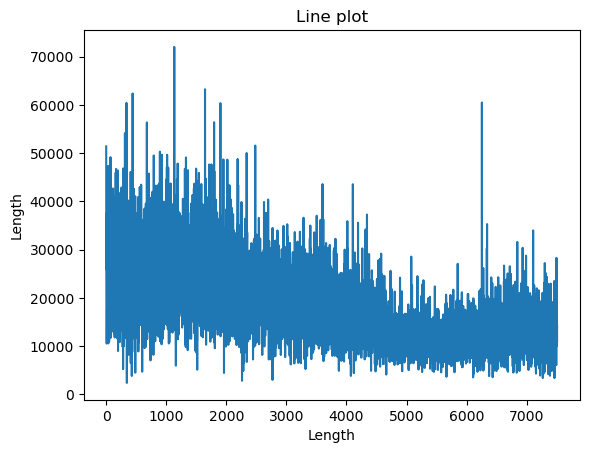

In [31]:
# .2 line plot for length column
df['length'].plot()
plt.xlabel('Length')
plt.ylabel('Length')
plt.title('Line plot')

### BOXPLOT

Text(0.5, 1.0, 'Boxplot for length')

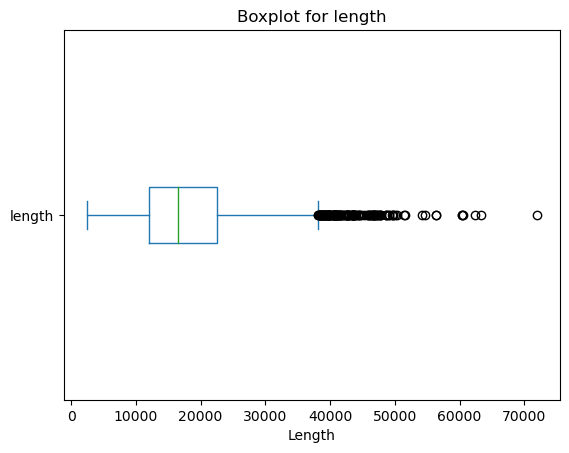

In [32]:
# Boxplot for length column
df['length'].plot(kind='box', vert=False)
plt.xlabel('Length')
plt.title('Boxplot for length')

### HISTOGRAM

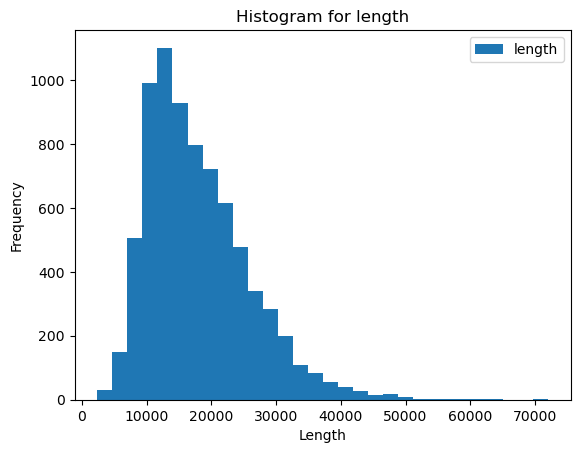

In [33]:
# Histogram for 30 samples for length coulmn

df['length'].plot(kind='hist', bins=30)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Histogram for length')
plt.legend()
plt.show()

### BOXPLOT

seaborn is used for making statistcal graphics in python

/Users/likithareddykotla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


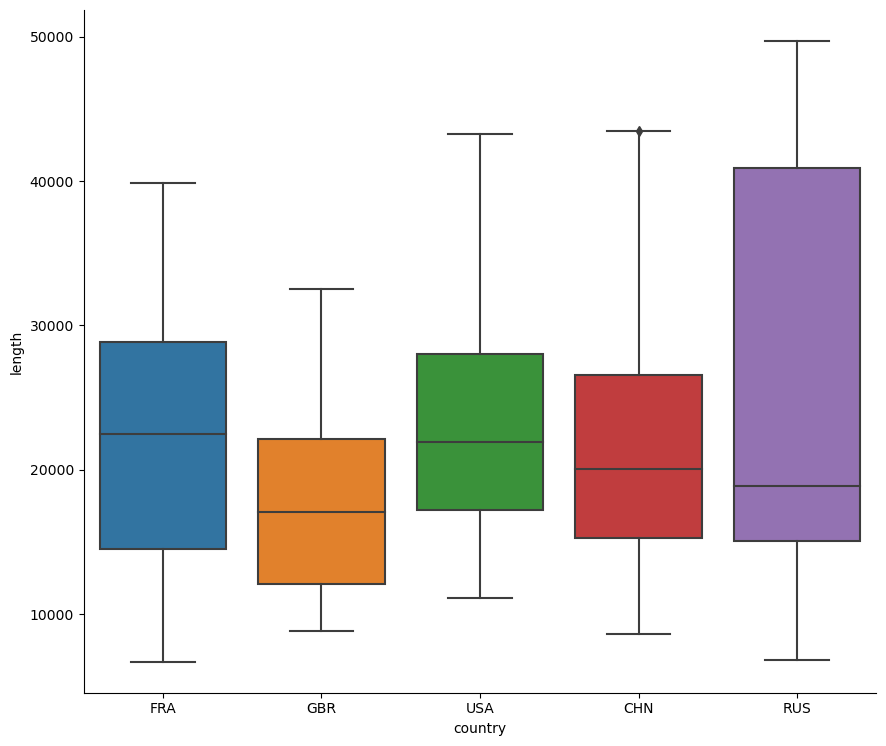

In [14]:
# Boxplot for 5 samples in Country column
import seaborn as sns 
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(10, 8) ###


### REGULAR EXPRESSIONS

REGEX :Regular expression (regex or regexp) is a sequence of characters that forms a search pattern. 
    It is a powerful tool for string manipulation and searching. 
    The re module in Python provides support for regular expressions.

In [34]:
# importing regex package
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [35]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
 
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


### STOPWORDS


In natural language processing, stopwords are commonly used words (such as "the," "is," "and," etc.) that are often excluded from text processing because they do not carry significant meaning and are used for grammatical structure. In Python, the nltk (Natural Language Toolkit) library is commonly used for working with text data, including handling stopwords.

In [36]:
#importing nltk package
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'themselves', 'how', 'too', 'this', 'any', 'wouldn', 'then', "mustn't", 'in', 'doing', 'them', 'each', 'until', 'is', "couldn't", 'these', 'after', 'm', 'out', 'why', 'when', 'your', 'we', 'just', 'didn', 'those', 'some', 'needn', 'hadn', 'you', 'am', 'herself', "that'll", 'and', 'was', 'ma', 'did', 'but', 'both', 'him', 'd', "weren't", 'as', 'up', 'yours', 'on', 'they', 'does', 've', 'own', 'have', 'from', 'now', 'be', 'o', 're', 'ain', 'his', "mightn't", "it's", 'doesn', 'our', 'before', 'during', 'mightn', 'against', 'are', 'what', 'nor', 'isn', 'myself', 'further', 'no', 'than', 'the', 'for', 't', 'all', 'their', 'to', 'her', 'only', 'so', "won't", 's', 'ours', 'were', "aren't", 'above', 'into', 'should', 'haven', "you'd", 'hasn', 'over', 'under', 'once', 'or', 'yourselves', 'theirs', "hadn't", 'at', 'its', 'by', 'off', 'about', 'mustn', 'same', 'while', 'won', 'will', "should've", 'my', 'been', 'himself', 'aren', 'i', 'which', 'where', 'had', 'weren', "wouldn't", 'few', 'wasn', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/likithareddykotla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Removing stopwords from given string
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
#testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [38]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [39]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [40]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()  # tail() function gives last 5 rows in a dataframe

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7502,70,2015,YEM,Yemen,MR. ABDRABUH MANSOUR HADI MANSOUR,PRESIDENT,ON BEHALF OF THE PEOPLE AND THE GOVERNMENT OF ...,10568,"[behalf, people, government, yemen, would, lik...",894
7503,70,2015,YUG,Yugoslavia,MR. TOMISLAV NIKOLIĆ,PRESIDENT,\nSEVENTY YEARS HAVE PASSED SINCE THE ESTABLIS...,25430,"[seventy, years, passed, since, establishment,...",2118
7504,70,2015,ZAF,South Africa,JACOB ZUMA,PRESIDENT,I SHOULD LIKE TO CONGRATULATE THE PRESIDENT AN...,13662,"[like, congratulate, president, country, denma...",1160
7505,70,2015,ZMB,Zambia,MR. EDGAR CHAGWA LUNGU,PRESIDENT,I WOULD LIKE TO BEGIN BY THANKING THE SECRETAR...,14247,"[would, like, begin, thanking, secretary-gener...",1197
7506,70,2015,ZWE,Zimbabwe,ROBERT MUGABE,PRESIDENT,ALLOW ME AT THE OUTSET TO EXTEND TO MR. MOGENS...,11013,"[allow, outset, extend, mr, mogens, lykketoft,...",903


### COUNTING WORDS

A Counter is a data type in the collections module. It is a dict subclass that stores counts for hashable objects.

In [22]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)   #counts each word and its occurence
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


### DISPLAYING KEY VALUES

In [23]:
counter = Counter()
df['tokens'].map(counter.update)  #iterates over each entry,updating the counter with the token counts
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [24]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1') #include only rows where the 'freq' column is greater than or equal to 1.
freq_df.index.name = 'token'

### SORTING

In [25]:
freq_df = freq_df.sort_values('freq', ascending=False) #Sorts and displays
freq_df.head(10)  

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [26]:
freq_df.describe() #describe() can give you information such as the count, mean, standard deviation...

,freq
count,68302.000000
mean,162.686276
std,1544.080072
min,1.000000
25%,1.000000
50%,2.000000
75%,15.000000
max,124508.000000


### BARPLOT

Bar plots are commonly used to show the distribution of a categorical variable or to compare the values of different categories.

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

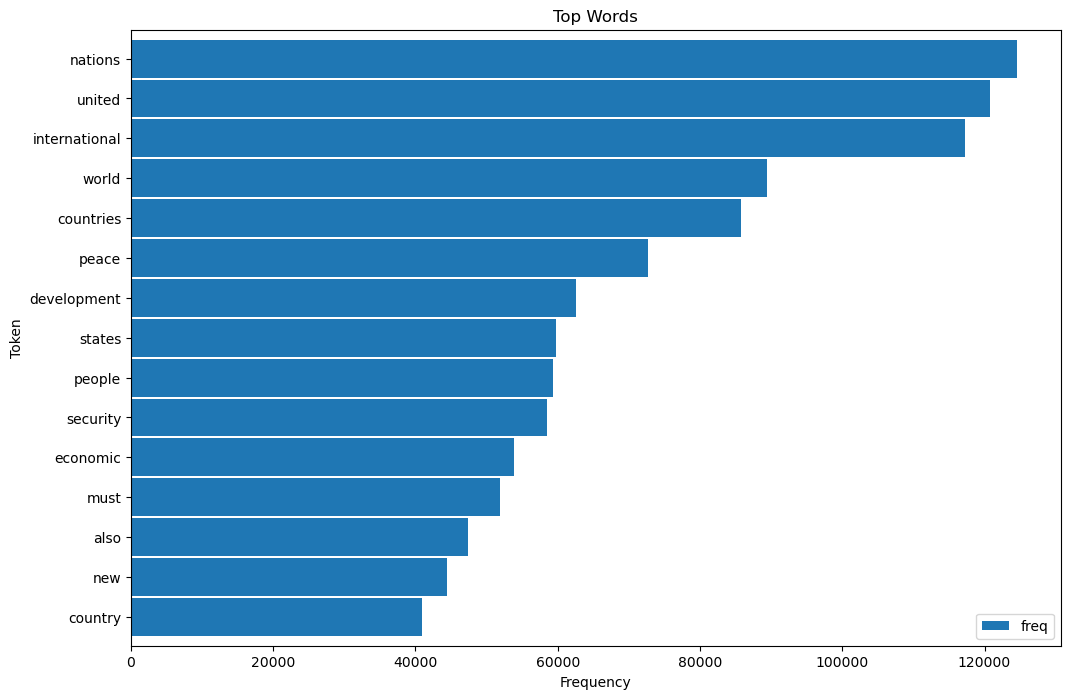

In [27]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()   #Inverts the y-axis, so the highest frequency is at the top of the plot.
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

### WORDCLOUD

Word cloud is one of the most powerful and straightforward visualization methods 
when it comes to text data. The size of words are dependent on the occurrence frequency 

(-0.5, 599.5, 599.5, -0.5)

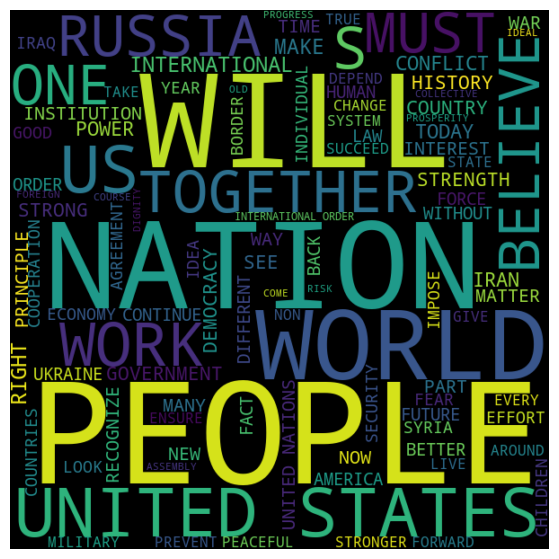

In [43]:
#importing wordcloud 
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='black', width = 600, height=600, max_words=100, margin=2)

text = df.query("year==2015 and country=='USA'")['text'].values[0]

plt.figure(figsize=(14, 7)) ###

wc.generate(text)   # Generates the WordCloud from the input text data.
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Example 2

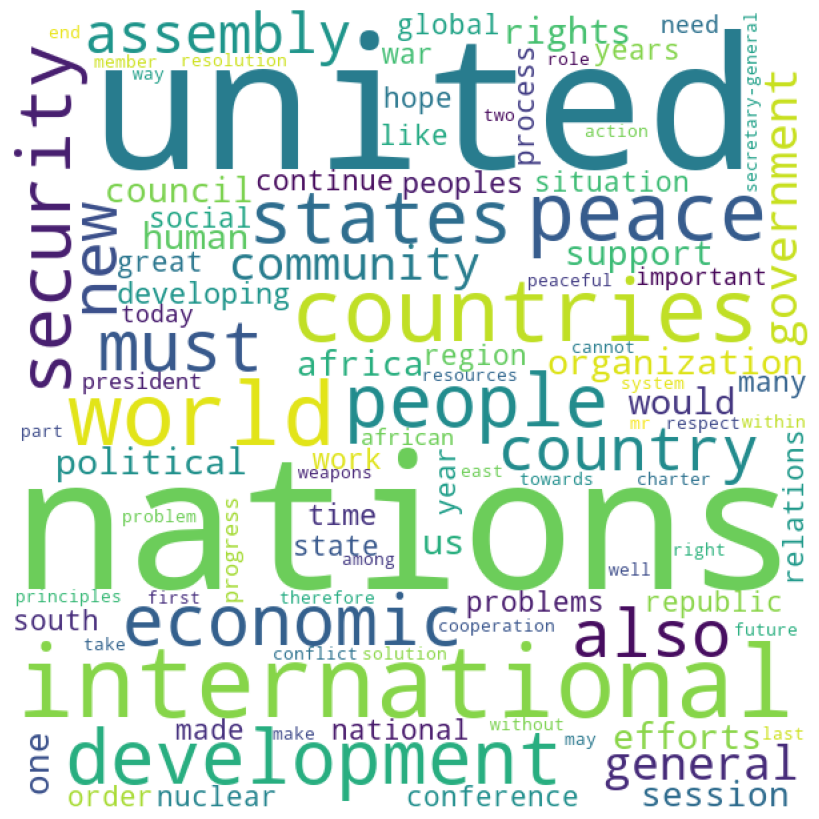

In [41]:
wc = WordCloud(background_color='white', width = 600, height=600, max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() ) # uses the frequency information from the DataFrame to fit the WordCloud.
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc) #displays the WordCloud.
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()